In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as skl

In [2]:
data = pd.read_csv("../data/papers_pop_pib.csv")

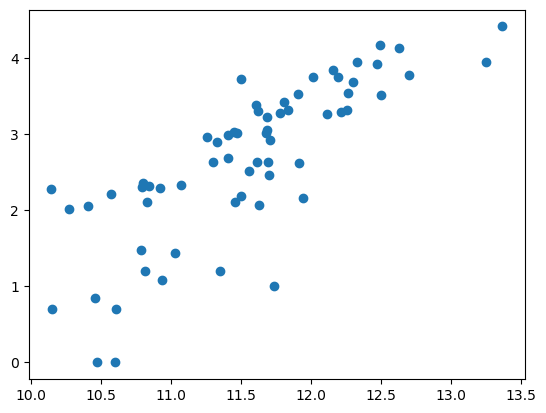

In [3]:
plt.scatter(np.log10(data["PIB"]), np.log10(data["Papers"]))

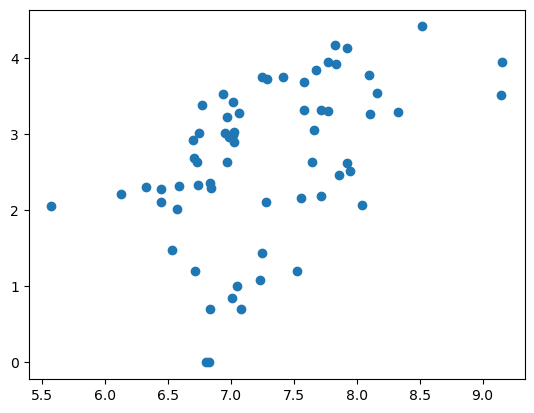

In [4]:
plt.scatter(np.log10(data["Pop"]), np.log10(data["Papers"]))

In [5]:
papers_col = float(data["Papers"][data["Country"]=="COL"])
pib_col = float(data["PIB"][data["Country"]=="COL"])
pop_col = float(data["Pop"][data["Country"]=="COL"])

print(papers_col, pib_col, pop_col)
ii = data["Papers"]>=papers_col
X = np.array([np.log10(data["PIB"][ii]), np.log10(data["Pop"][ii])])
X = X.T
Y = np.array([np.log10(data["Papers"][ii])])
Y = Y.T
paises = np.array(data["Country"][ii])

154.0 318511813577.0 51516562.0


In [6]:
def find_best_fit(X, Y):
    reg = skl.LinearRegression().fit(X, Y)
    return reg.coef_, reg.intercept_, reg.score(X,Y)

In [7]:
def new_data_from_bootstrap(X, Y):
    n = len(Y)
    ids = np.arange(n)
    new_ids = np.random.choice(ids, size=n)
    return X[new_ids,:], Y[new_ids]

In [8]:
def bootstrap_results(X, Y, n_bootstrap=100):
    coefs = []
    intercepts = []
    scores = []
    for i in range(n_bootstrap):
        new_X, new_Y = new_data_from_bootstrap(X,Y)
        coef, intercept, score = find_best_fit(new_X, new_Y)
        coefs.append(coef)
        intercepts.append(intercept)
        scores.append(score)
    return np.array(coefs), np.array(intercepts), np.array(scores)

In [9]:
n_bootstrap = 1000
coefs, intercepts, scores = bootstrap_results(X,Y, n_bootstrap=n_bootstrap)

1.0447832710709741 -0.2869354992442438 -7.025540017504216


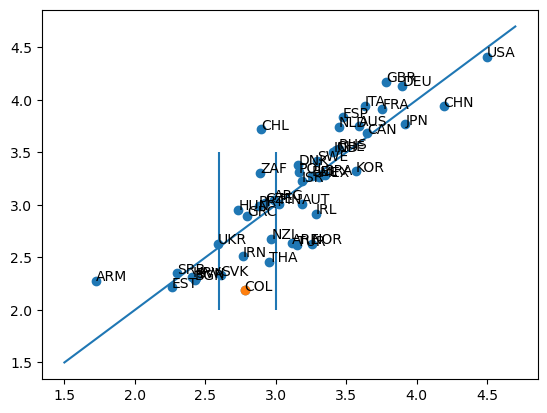

In [11]:
best_coefs = np.mean(coefs, axis=0)
best_intercept = np.mean(intercepts, axis=0)
new_X = best_coefs[0,0]*X[:,0] + best_coefs[0,1]*X[:,1] + best_intercept[0]
n_points = 40
theory_X = np.linspace(1.5, 4.7, n_points)
plt.scatter(new_X, Y)
new_X_col = best_coefs[0,0]*np.log10(pib_col) + best_coefs[0,1]*np.log10(pop_col) + best_intercept[0]
plt.scatter(new_X_col, np.log10(papers_col))
plt.plot(theory_X, theory_X)
print(best_coefs[0,0], best_coefs[0,1], best_intercept[0])
for i, p in enumerate(paises):
    new_X_p = best_coefs[0,0]*X[i,0] + best_coefs[0,1]*X[i,1] + best_intercept[0]
    Y_p = Y[i]
    plt.text(new_X_p, Y_p,p)
#plt.xlim(2.2,3.5)
#plt.ylim(2.0,3.5)
plt.vlines(3, 2.0, 3.5)
plt.vlines(2.6, 2.0, 3.5)

1.0447832710709728 0.13106126127719184
-0.28693549924424405 0.12150130792365978
-7.025540017504216 0.8887479579415345


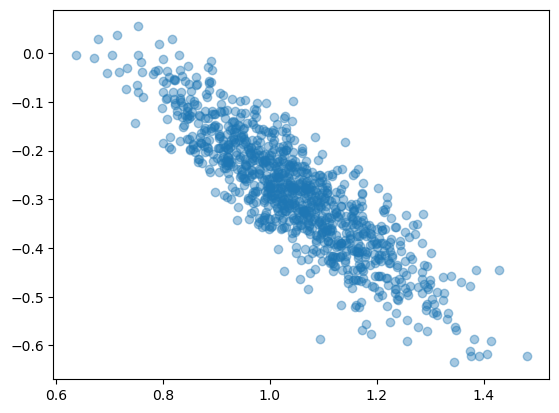

In [12]:
plt.scatter(coefs[:,0,0], coefs[:,0,1], alpha=0.4)
print(np.mean(coefs[:,0,0]), np.std(coefs[:,0,0]))
print(np.mean(coefs[:,0,1]), np.std(coefs[:,0,1]))
print(np.mean(intercepts[:,0]), np.std(intercepts[:,0]))

0.7631530686009117 0.06123446546180066


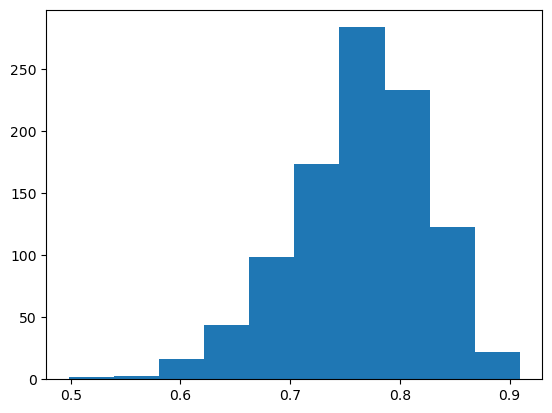

In [13]:
plt.hist(scores)
print(scores.mean(), scores.std())

In [16]:
log10_papers = np.zeros(n_bootstrap)
for i in range(n_bootstrap):
    coef_A = coefs[i,0,0]
    coef_B = coefs[i,0,1]
    inter = intercepts[i,0]
    log10_papers[i] = coef_A * np.log10(pib_col) + coef_B * np.log10(pop_col) + inter

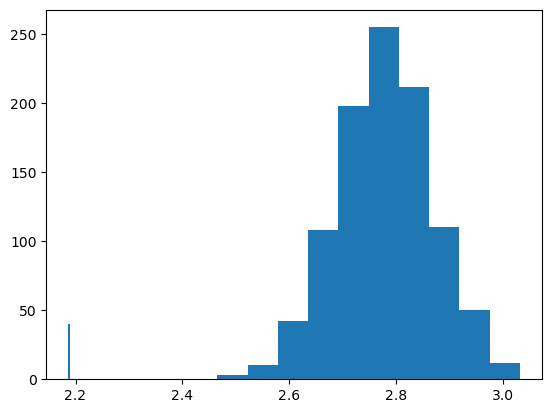

In [17]:
plt.hist(log10_papers)
plt.vlines(np.log10(papers_col),0,40)

In [18]:
ratio = 10**(log10_papers)/ papers_col
print(ratio.mean(), ratio.std())

3.993105892163344 0.8144326854969948
